# Cancer prediction with machine learning
The collection of data is part of the RNA-seq PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: Breast Cancer (BRCA), Kidney renal clear cell carcinoma (KIRC), Colon adenocarcinoma (COAD), Lung adenocarcinoma (LUAD) and Prostate Adenocarcinoma (PRAD).
Source: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

## Import Libraries

In [ ]:
pip install --upgrade scikit-learn

In [5]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

## Import data

In [6]:
data = pd.read_csv("cancer_gene_expression.zip")

## Explore data and clean data

In [7]:
print(data.shape)

(801, 8001)


In [9]:
print(data.columns[0:5])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')


In [13]:
#last column is cancer type
print(data.columns[-1])

Cancer_Type


In [14]:
#check for missing values
datanul=data.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [15]:
print(data['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


Axes(0.125,0.11;0.775x0.77)


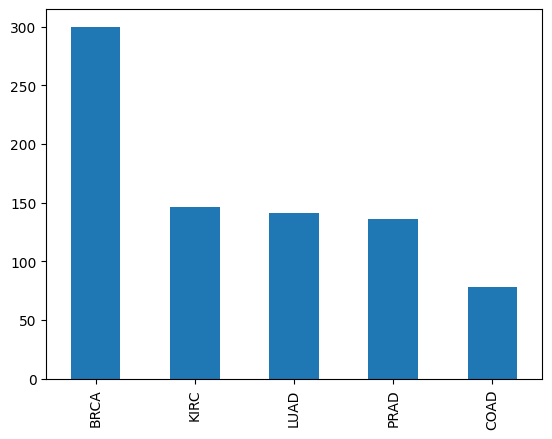

In [16]:
print(data['Cancer_Type'].value_counts().plot.bar())

## Data preprocessing

In [17]:
X = data.drop(["Cancer_Type"], axis=1)
y = data["Cancer_Type"]

In [18]:
#encode y values with values between 0 and n_classes-1
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [21]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [22]:
classes

array([0, 1, 2, 3, 4])

## Split data into training and testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 0)

In [29]:
X_train

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
364,0.000000,0.748375,0.0,2.686904,0.0,0.0,0.00000,0.0,1.238665,1.238665,...,7.072845,11.797240,8.223036,2.344658,6.831181,11.594577,7.980517,10.639684,7.590467,3.083894
458,0.000000,0.000000,0.0,3.571932,0.0,0.0,0.00000,0.0,1.845350,4.094135,...,5.585648,11.954880,8.427778,5.051272,6.667069,11.980147,7.869649,9.974687,3.440261,3.440261
76,0.000000,0.000000,0.0,3.390819,0.0,0.0,0.00000,0.0,1.066881,2.988103,...,7.377158,11.970217,8.023056,2.522181,7.409204,11.309397,8.715423,9.893855,6.652988,0.448901
64,0.000000,0.000000,0.0,2.179861,0.0,0.0,0.00000,0.0,2.571313,2.482952,...,5.496283,11.068946,9.549954,6.439708,7.119616,11.669018,7.911452,10.428119,6.373664,4.275126
638,0.000000,0.000000,0.0,1.520196,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,8.735187,13.437609,6.334738,3.454729,5.374327,11.681326,6.653087,10.490179,1.803640,0.698485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.0,2.372562,0.0,0.0,0.00000,0.0,0.762476,0.000000,...,5.841870,11.478926,8.874539,6.425688,6.762880,11.724198,6.657341,10.045009,6.218673,0.000000
192,0.000000,0.000000,0.0,2.126180,0.0,0.0,0.00000,0.0,0.506602,2.693565,...,6.427217,11.879396,8.539376,1.177663,5.686047,11.826735,8.534474,10.781999,6.840325,0.880803
629,0.000000,0.000000,0.0,1.950991,0.0,0.0,0.00000,0.0,0.000000,2.405856,...,7.880092,11.356804,7.404273,7.437461,6.785027,11.623945,7.136837,10.010962,6.252510,1.053042
559,0.664119,0.000000,0.0,3.399978,0.0,0.0,0.00000,0.0,1.086920,3.237518,...,6.795507,11.964727,7.581622,6.853883,6.601717,12.002175,7.538655,9.408268,3.740550,2.302992


## Data normalization

In [25]:
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [28]:
X_train_norm

array([[0.        , 0.11382128, 0.        , ..., 0.42789105, 0.64577898,
        0.31667146],
       [0.        , 0.        , 0.        , ..., 0.26884055, 0.24748025,
        0.35326523],
       [0.        , 0.        , 0.        , ..., 0.24950761, 0.55580834,
        0.04609566],
       ...,
       [0.        , 0.        , 0.        , ..., 0.27751651, 0.51737413,
        0.10813221],
       [0.44802291, 0.        , 0.        , ..., 0.13336752, 0.2762992 ,
        0.23648403],
       [0.        , 0.        , 0.        , ..., 0.321243  , 0.27127218,
        0.29363274]])

## Feature selection

In [42]:
MI=mutual_info_classif(X_train_norm,y_train)

In [43]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [44]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [45]:
X_train_selected.shape

(640, 300)

## Train the model

In [46]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

## Model Evaluation

In [47]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9498
precision:0.9597
recall:0.9565
f1score:0.9558


classification report


              precision    recall  f1-score   support

        BRCA       0.92      1.00      0.96        65
        COAD       1.00      1.00      1.00        12
        KIRC       1.00      0.97      0.98        31
        LUAD       0.96      0.96      0.96        25
        PRAD       1.00      0.82      0.90        28

    accuracy                           0.96       161
   macro avg       0.98      0.95      0.96       161
weighted avg       0.96      0.96      0.96       161



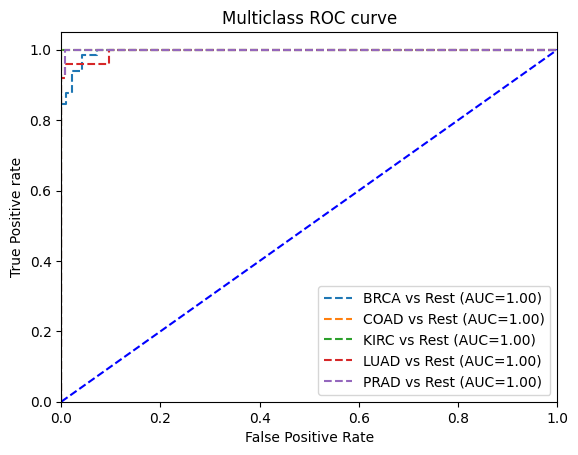

In [48]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()